## Обзор данных о продажах магазина в разных странах

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime

In [2]:
path = 'retails.zip'
retail = pd.read_csv(path, encoding='ISO-8859-1', compression='zip')
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


### Столбцы в таблице retails
*InvoiceNo* — номер транзакции 

*StockCode* — код товара 

*Description* — описание товара 

*Quantity* — количество единиц товара, добавленных в заказ 

*InvoiceDate* — дата транзакции

*UnitPrice* — цена за единицу товара 

*CustomerID* — id клиента 

*Country* — страна, где проживает клиент 

### Подготовим данные для дальнейшего анализа

In [3]:
retail.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

В данных имеется большое количество пропущенных значений по двум параметрам - описание товара и id пользователя. Будем считать это ошибочными данными, поэтому удалим эти строки и не будем рассматривать их в дальнейшем исследовании.

In [4]:
retail.loc[retail.Quantity < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


Отмененные заказы имеют 2 отличительных признака - InvoiceNo начинается с "С" или Quantity < 0 

In [5]:
retail = retail.dropna()

Проверим наличие дубликатов в исходных данных. При наличии дубликатов - удалим их.

In [6]:
retail.loc[retail.duplicated()] #проверяем наличие дубликатов и их количество
retail = retail.drop_duplicates() #удаляем дубликаты из датафрейма

Выведем все отмененные транзакции. Ищем их по принципу - в начале InvoiceNo которых стоит буква С(cancelled). Всего пользователи отменили **8872** транзакцию

In [7]:
canceled_invoice = retail.loc[retail.InvoiceNo.str.startswith('C')]
canceled_invoice.InvoiceNo.count()

8872

Теперь из исходных данных оставим только успешные транзакции

In [8]:
success_retail = retail[retail.InvoiceNo.str[0] != 'C']
success_retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


### Рассмотрим общую информацию подробнее - посчитаем выручку и сравним данные по странам

Посчитаем *выручку* и посмотрим топ-5 стран по выручке

In [9]:
success_retails = success_retail.assign(Revenue = round(retail.Quantity * retail.UnitPrice, 0))
success_retails = success_retails.groupby('Country', as_index=False) \
    .agg({'Revenue':'sum'}) \
    .rename(columns={'Revenue':'Country_revenue'}) \
    .sort_values('Country_revenue', ascending=False)
success_retails.head(5)

,Country,Country_revenue
35,United Kingdom,7284203.0
23,Netherlands,285396.0
10,EIRE,265286.0
14,Germany,228644.0
13,France,208857.0


Посмотрим на **распределение выручки** по странам без учета UK, так как данные слишком разнятся и график получается не информативный

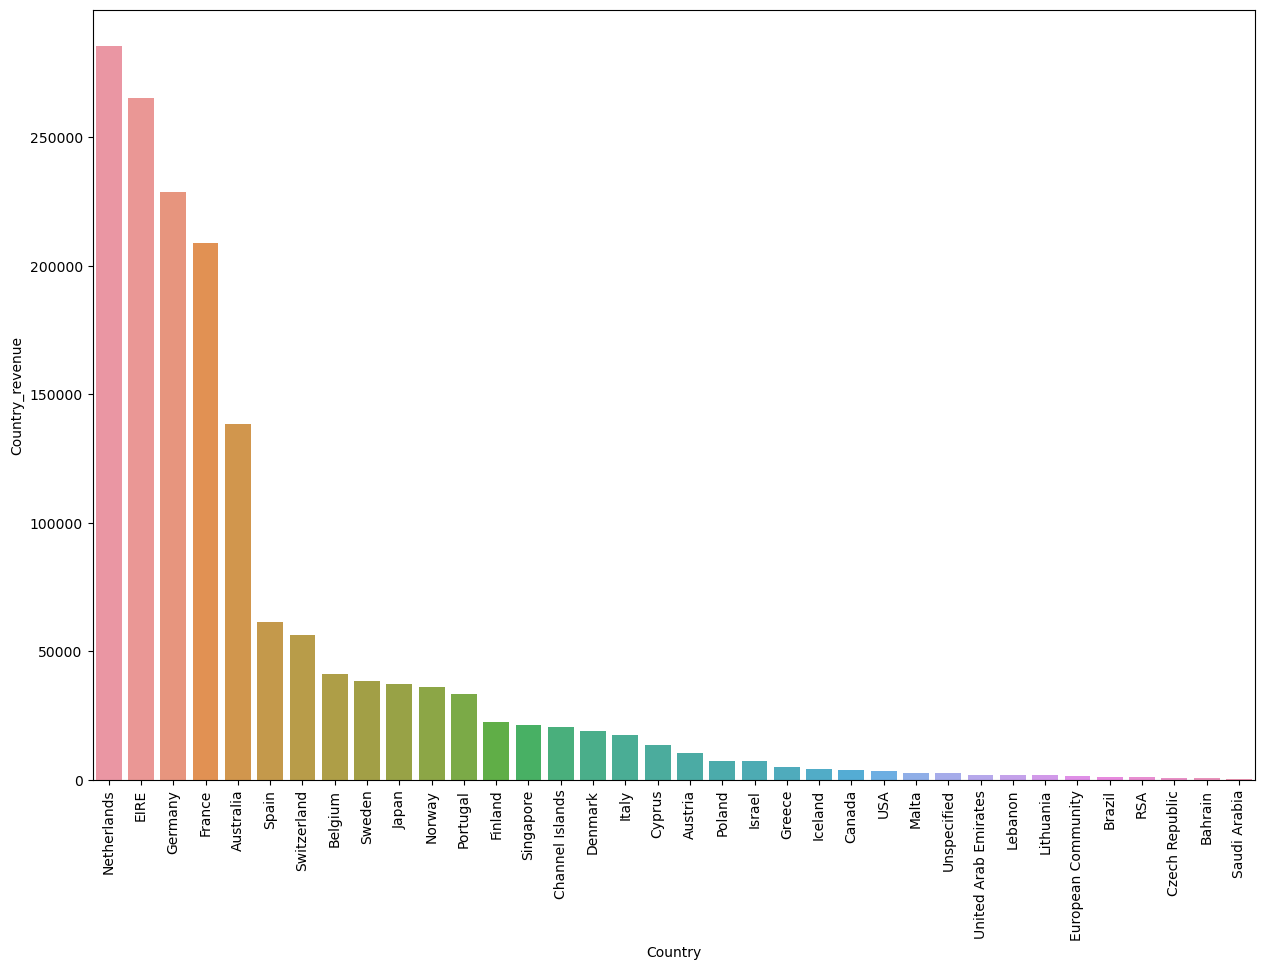

In [10]:
plt.figure(figsize=(15, 10))
plt.xticks(rotation=90)
ax = sns.barplot(success_retails[success_retails.Country != 'United Kingdom'], x = 'Country', y = 'Country_revenue')

По графику можно заметить, что объемы выручки в разных странах сильно отличаются. Наибольший объем выручки у *Netherlands*, *EIRE*, *Germany*. Наименьший объем выручки у *Czech Republic*, *Bahrain*, *Saudi Arabia*.

**Сравним общую выручку по всем странам (без учета UK) с выручкой по UK для наглядности**

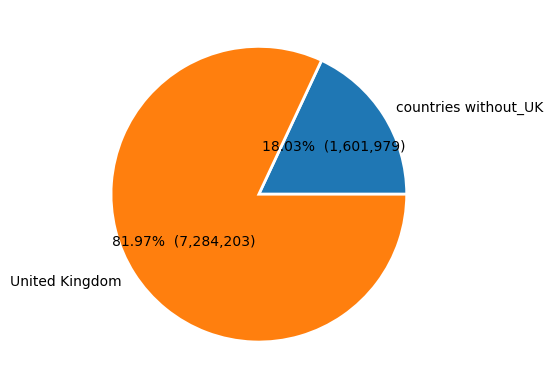

In [15]:
general_revenue = pd.DataFrame([['countries without_UK', success_retails.query('Country != "United Kingdom"') \
                                 .Country_revenue.sum()]], columns=['Country', 'Country_revenue'])
UK_revenue = success_retails.query('Country == "United Kingdom"')
compare_revenue = pd.concat([general_revenue, UK_revenue], axis=0)
plt.pie(compare_revenue['Country_revenue'], labels=compare_revenue['Country'], 
        wedgeprops={"linewidth": 2, "edgecolor": "white"}, 
        autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(compare_revenue['Country_revenue'])/100))
plt.show()

*По соотношению видно, что United Kingdom является крйпнейшим продавцом. Возможно, это страна-производитель.* 

*Объем от общей выручки составляет 82%.*

### Изучим распределение выручки UK во времени

In [16]:
success_retail_UK = success_retail.query('Country == "United Kingdom"').assign(Revenue = round(retail.Quantity * retail.UnitPrice, 0))
success_retail_UK.InvoiceDate = pd.to_datetime(success_retail_UK.InvoiceDate).dt.date
ax = success_retail_UK.groupby('InvoiceDate', as_index=False).agg({'Revenue':'sum'}).sort_values('InvoiceDate', ascending=True)

<Axes: xlabel='InvoiceDate', ylabel='Revenue'>

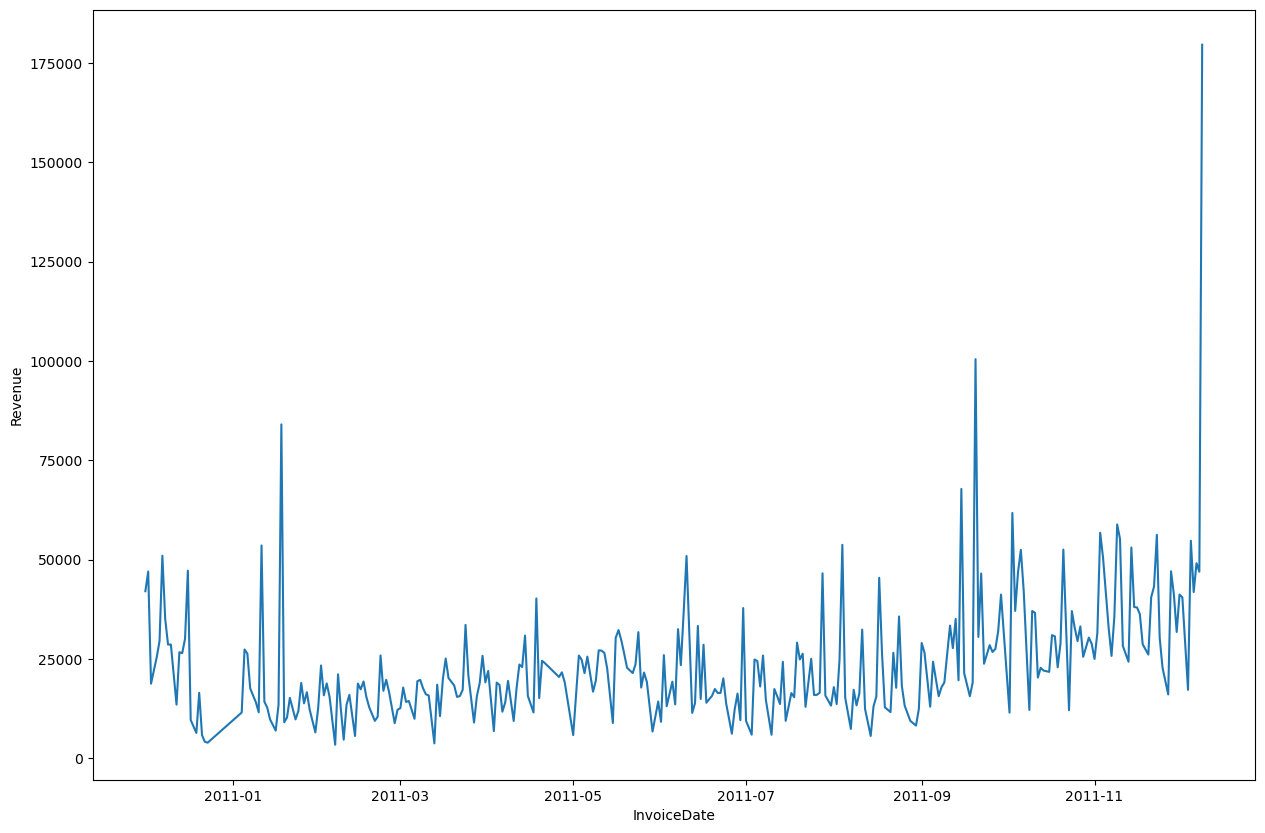

In [17]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=ax, x='InvoiceDate', y ='Revenue')

По графику видно, что выручка United Kingdom во времени имеет флуктуационный характер. Однако, после ноября 2011 года выручка резко растет.